In [1]:
#Importing the necessary dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing datastet
monthly = pd.read_csv('monthly_deaths.csv')
yearly = pd.read_csv('yearly_deaths_by_clinic.csv')

# Monthly Dataset

In [3]:
monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [4]:
monthly.shape

(98, 3)

In [5]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [6]:
monthly['date'] = pd.to_datetime(monthly['date'])

In [7]:
monthly.dtypes

date      datetime64[ns]
births             int64
deaths             int64
dtype: object

In [8]:
monthly.describe()

,births,deaths
count,98.000000,98.000000
mean,267.000000,22.469388
std,41.769372,18.141031
min,190.000000,0.000000
25%,242.500000,8.000000
50%,264.000000,16.500000
75%,292.750000,36.750000
max,406.000000,75.000000


In [9]:
monthly['month'] = pd.to_datetime(monthly['date']).dt.month
monthly['year'] = pd.to_datetime(monthly['date']).dt.year

In [10]:
monthly['year'].value_counts()

1842    12
1843    12
1844    12
1845    12
1846    12
1847    12
1848    12
1841    11
1849     3
Name: year, dtype: int64

Text(0.5, 1.0, 'Year Against Deaths')

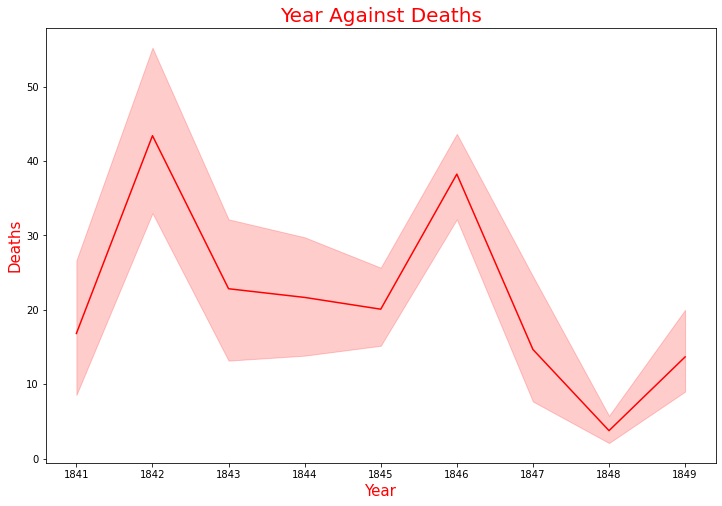

In [40]:
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(x = monthly['year'], y = monthly['deaths'], color = 'red')
plt.xlabel('Year', size = (15), color = 'red')
plt.ylabel('Deaths', size = 15, color = 'red')
plt.title('Year Against Deaths', size = (20), color = 'red')

From the graph we can see that the amount of deaths reduced drastically from 1846

Text(0.5, 1.0, 'Year Against Births')

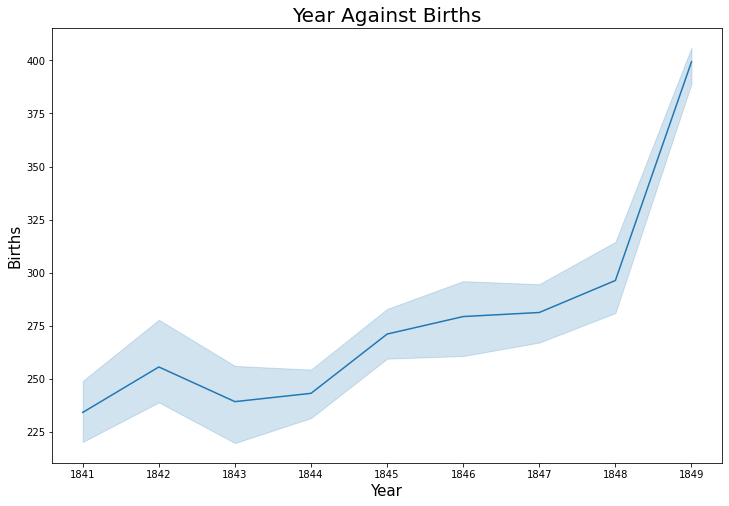

In [41]:
fig,ax = plt.subplots(figsize = (12,8))
sns.lineplot(x = monthly['year'], y = monthly['births'])
plt.xlabel('Year', size = (15))
plt.ylabel('Births', size = 15)
plt.title('Year Against Births', size = (20))

Births increased steadiliy from 1845

Text(0.5, 1.0, 'Months Against Births')

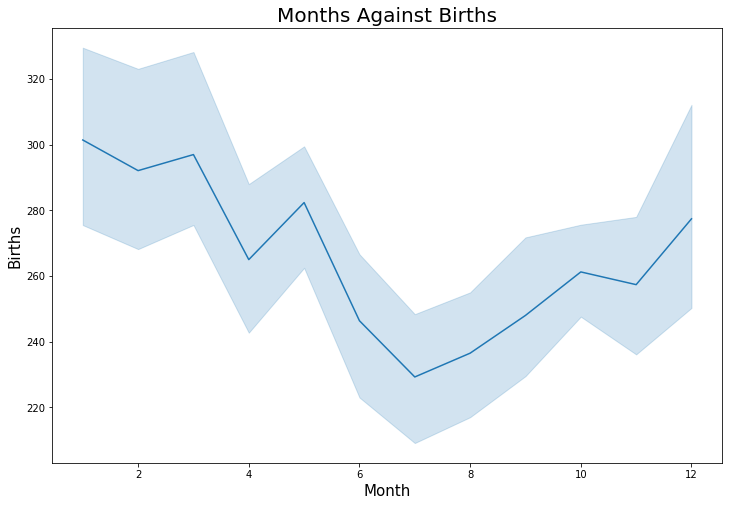

In [42]:
fig,ax = plt.subplots(figsize = (12,8))
sns.lineplot(x = monthly['month'], y = monthly['births'])
plt.xlabel('Month', size = (15))
plt.ylabel('Births', size = 15)
plt.title('Months Against Births', size = (20))

It was also observed that March has the highest amount of births

Text(0.5, 1.0, 'Months Against Deaths')

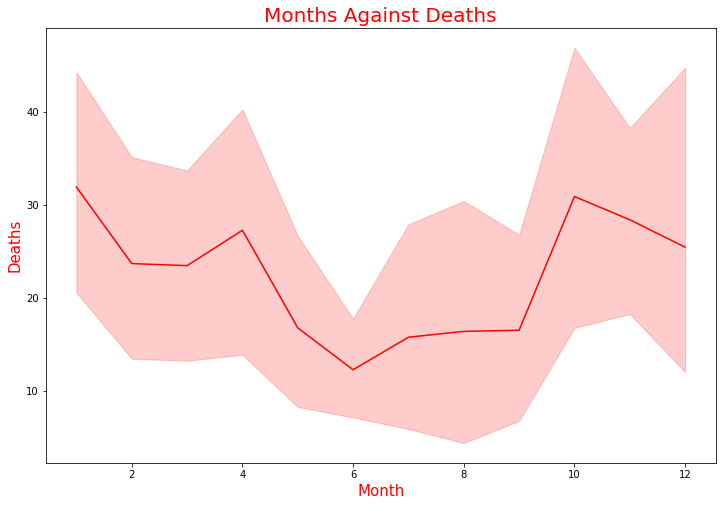

In [43]:
fig,ax = plt.subplots(figsize = (12,8))
sns.lineplot(x = monthly['month'], y = monthly['deaths'], color = 'red')
plt.xlabel('Month', size = (15), color = 'red')
plt.ylabel('Deaths', size = (15), color ='red')
plt.title('Months Against Deaths', size = (20), color = 'red')

More death occured in October

In [44]:
#proportion of deaths per month
monthly["Proportion of Deaths"]= monthly["deaths"] / monthly["births"]
monthly.head(5)

,date,births,deaths,month,year,Proportion of Deaths
0,1841-01-01,254,37,1,1841,0.145669
1,1841-02-01,239,18,2,1841,0.075314
2,1841-03-01,277,12,3,1841,0.043321
3,1841-04-01,255,4,4,1841,0.015686
4,1841-05-01,255,2,5,1841,0.007843


In [47]:
#proportion of births
monthly["Proportion of Births"]= monthly["births"] / monthly["deaths"]
monthly.head(5)

,date,births,deaths,month,year,Proportion of Deaths,Proportion of Births
0,1841-01-01,254,37,1,1841,0.145669,6.864865
1,1841-02-01,239,18,2,1841,0.075314,13.277778
2,1841-03-01,277,12,3,1841,0.043321,23.083333
3,1841-04-01,255,4,4,1841,0.015686,63.750000
4,1841-05-01,255,2,5,1841,0.007843,127.500000


Text(0.5, 1.0, 'Months Against Proportion of Deaths')

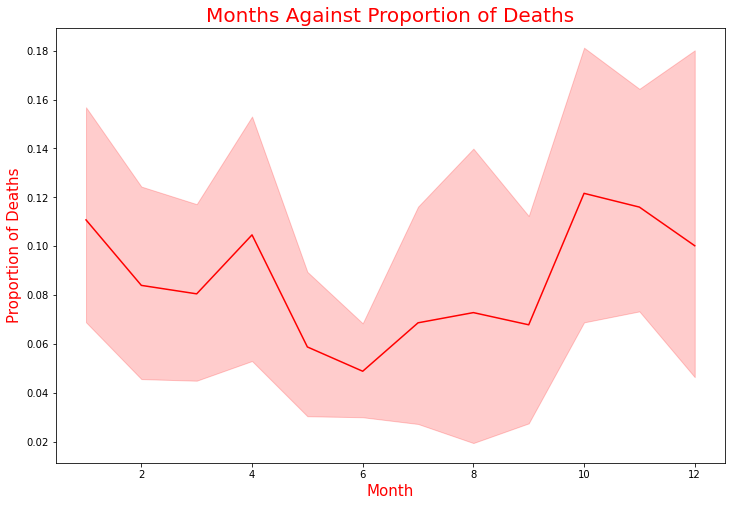

In [45]:
#Proportion of Deaths
fig,ax = plt.subplots(figsize = (12,8))
sns.lineplot(x = monthly['month'], y = monthly['Proportion of Deaths'], color = 'red')
plt.xlabel('Month', size = (15), color = 'red')
plt.ylabel('Proportion of Deaths', size = (15), color ='red')
plt.title('Months Against Proportion of Deaths', size = (20), color = 'red')

Handwashing started in the summer of 1847

In [53]:
#indicate the time handwashing begins to track the decrease in the deaths afterwards
handwashing_begins = pd.to_datetime('1847-06-01')

before_washing = monthly[monthly["date"] < handwashing_begins]
after_washing = monthly[monthly["date"] >= handwashing_begins]

Text(0, 0.5, 'Proportion of Deaths')

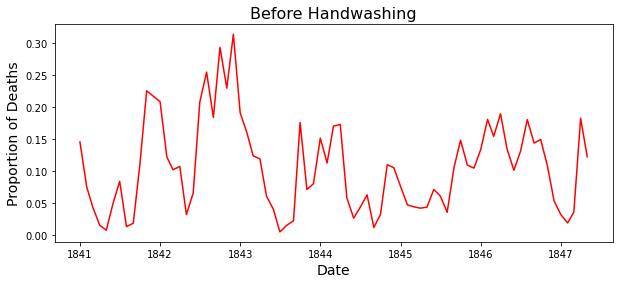

In [63]:
fig,ax = plt.subplots(figsize = (10,4))
sns.lineplot(x = before_washing['date'], y = before_washing['Proportion of Deaths'], color = 'red')
plt.title("Before Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)

Text(0, 0.5, 'Proportion of Deaths')

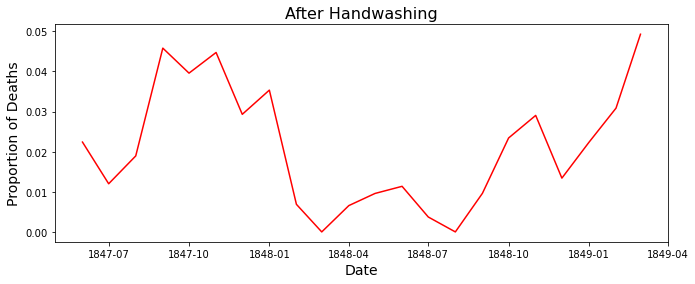

In [66]:
fig,ax = plt.subplots(figsize = (11,4))
sns.lineplot(x = after_washing['date'], y = after_washing['Proportion of Deaths'], color = 'red')
plt.title("After Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)

<AxesSubplot:xlabel='date', ylabel='Proportion deaths'>

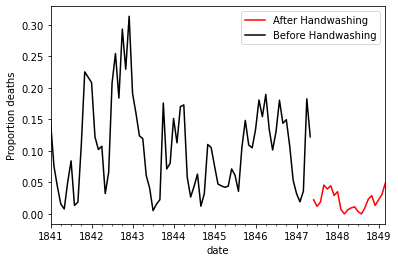

In [76]:
#to combine the plot to clearly see the difference
ax = after_washing.plot(x= "date", y= "Proportion of Deaths", label= "After Handwashing", ylabel= "Proportion deaths", color="red") 
before_washing.plot(x= "date", y= "Proportion of Deaths", label= "Before Handwashing", ax=ax, color="black")

We can see that the death reduced after handwashing began

In [79]:
# mathematically on average
mean_before = before_washing["Proportion of Deaths"].mean()
mean_after = after_washing['Proportion of Deaths'].mean()
print('The mean proportion of death after handwashing begins is {}'.format(mean_after))
print('The mean proportion of death before handwashing begins is {}'.format(mean_before))

The mean proportion of death after handwashing begins is 0.021093375097254535
The mean proportion of death before handwashing begins is 0.10504998260908793


In [83]:
diff = mean_after - mean_before
diff *100

-8.395660751183339

This indicates an approximate 8% decrease in death

# Yearly Dataset

In [84]:
yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [86]:
yearly.info()
# no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [88]:
yearly.shape

(12, 4)

In [102]:
yearly.groupby("clinic") ["deaths"].sum()

clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64

In [103]:
yearly.groupby("clinic") ["births"].sum()

clinic
clinic 1    20042
clinic 2    17791
Name: births, dtype: int64

In [115]:
#checking the clinics separately
clinic_1 = yearly[yearly["clinic"] == "clinic 1"]
clinic_2 = yearly[yearly["clinic"] == "clinic 2"]
clinic_1

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1


# Clinic 2 Analysis

In [116]:
clinic_2

,year,births,deaths,clinic
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2
10,1845,3241,66,clinic 2
11,1846,3754,105,clinic 2


In [121]:
total_birth = clinic_2['births'].sum()
total_death = clinic_2['deaths'].sum()
print('Total Births for Clinc 2 is {}'. format(total_birth))
print('Total Deaths for Clinc 2 is {}'. format(total_death))

Total Births for Clinc 2 is 17791
Total Deaths for Clinc 2 is 691


In [124]:
grand_total = total_birth + total_death
grand_total

18482

In [131]:
birth_percent = (total_birth / grand_total) * 100
death_percent = (total_death / grand_total) * 100
print('The percentage of births is {}%'.format(birth_percent))
print('*********************************')
print('The percentage of deaths is {}%'.format(death_percent))

The percentage of births is 96.26122713991992%
*********************************
The percentage of deaths is 3.738772860080078%


We have more births

In [145]:
#the proportion of deaths.
clinic_2["Percent_Prop of Deaths"] = (clinic_2["deaths"] / clinic_2["births"]) * 100
clinic_2

C:\Users\USER\AppData\Local\Temp\ipykernel_1452\726138497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinic_2["Percent_Prop of Deaths"] = (clinic_2["deaths"] / clinic_2["births"]) * 100


,year,births,deaths,clinic,Percent_Prop of Deaths
6,1841,2442,86,clinic 2,3.521704
7,1842,2659,202,clinic 2,7.596841
8,1843,2739,164,clinic 2,5.987587
9,1844,2956,68,clinic 2,2.300406
10,1845,3241,66,clinic 2,2.036409
11,1846,3754,105,clinic 2,2.797017


Text(0, 0.5, 'Number of Deaths')

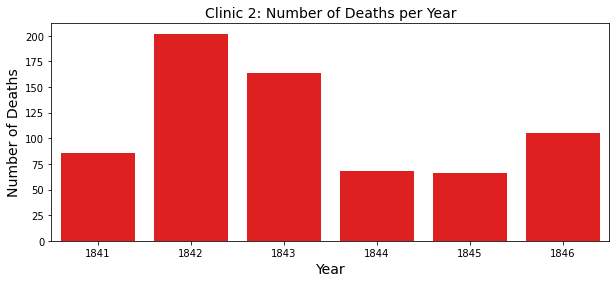

In [146]:
#Visualize the Number of deaths every year in clinic 1
fig,ax = plt.subplots(figsize = (10,4))
sns.barplot(x = clinic_2['year'], y = clinic_2['deaths'], color= "red")
plt.title("Clinic 2: Number of Deaths per Year", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)

Text(0, 0.5, 'Number of Births')

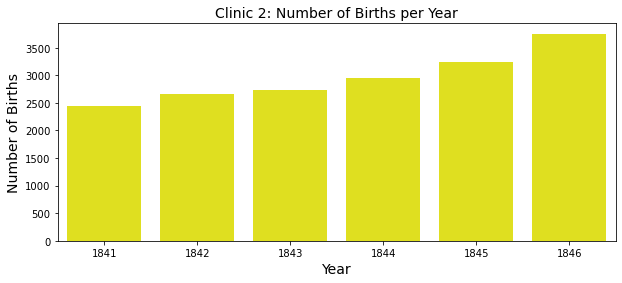

In [147]:
#Visualize the Number of birth every year in clinic 1
fig,ax = plt.subplots(figsize = (10,4))
sns.barplot(x = clinic_2['year'], y = clinic_2['births'], color= "yellow")
plt.title("Clinic 2: Number of Births per Year", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Births", fontsize=14)

# Clinic 1 Analylsis

In [135]:
clinic_1

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1


In [136]:
total_birth = clinic_1['births'].sum()
total_death = clinic_1['deaths'].sum()
print('Total Births for Clinc 1 is {}'. format(total_birth))
print('Total Deaths for Clinc 1 is {}'. format(total_death))

Total Births for Clinc 1 is 20042
Total Deaths for Clinc 1 is 1989


In [137]:
grand_total = total_birth + total_death
grand_total

22031

In [138]:
birth_percent = (total_birth / grand_total) * 100
death_percent = (total_death / grand_total) * 100
print('The percentage of births is {}%'.format(birth_percent))
print('*********************************')
print('The percentage of deaths is {}%'.format(death_percent))

The percentage of births is 90.97181244609868%
*********************************
The percentage of deaths is 9.02818755390132%


In [144]:
#the proportion of deaths.
clinic_1["Percent_Prop of Deaths"] = (clinic_1["deaths"] / clinic_1["births"]) * 100
clinic_1

C:\Users\USER\AppData\Local\Temp\ipykernel_1452\3795169236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinic_1["Percent_Prop of Deaths"] = (clinic_1["deaths"] / clinic_1["births"]) * 100


,year,births,deaths,clinic,Proportion of Deaths,Percent_Prop of Deaths
0,1841,3036,237,clinic 1,0.078063,7.806324
1,1842,3287,518,clinic 1,0.157591,15.759051
2,1843,3060,274,clinic 1,0.089542,8.954248
3,1844,3157,260,clinic 1,0.082357,8.235667
4,1845,3492,241,clinic 1,0.069015,6.901489
5,1846,4010,459,clinic 1,0.114464,11.446384


Text(0, 0.5, 'Number of Deaths')

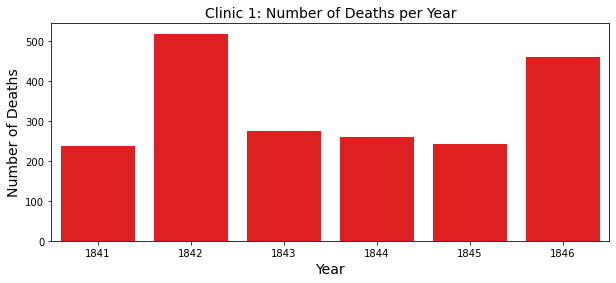

In [140]:
#Visualize the Number of deaths every year in clinic 1
fig,ax = plt.subplots(figsize = (10,4))
sns.barplot(x = clinic_1['year'], y = clinic_1['deaths'], color= "red")
plt.title("Clinic 1: Number of Deaths per Year", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)

Highest number of deaths in 1842

Text(0, 0.5, 'Number of Births')

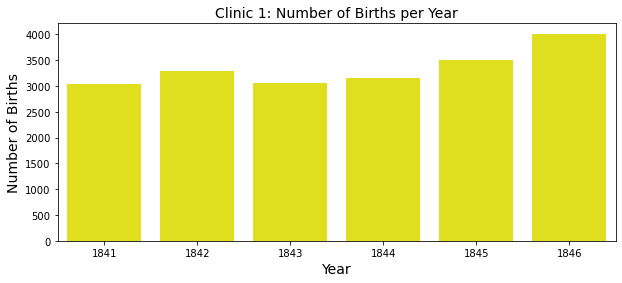

In [148]:
#Visualize the Number of birth every year in clinic 1
fig,ax = plt.subplots(figsize = (10,4))
sns.barplot(x = clinic_1['year'], y = clinic_1['births'], color= "yellow")
plt.title("Clinic 1: Number of Births per Year", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Births", fontsize=14)

<AxesSubplot:xlabel='year', ylabel='births'>

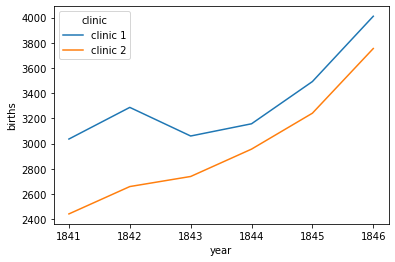

In [91]:
#to check the births by year in the clinics
sns.lineplot(x = yearly['year'], y = yearly['births'], hue = yearly['clinic'])

<AxesSubplot:title={'center':'Deaths'}, xlabel='year', ylabel='deaths'>

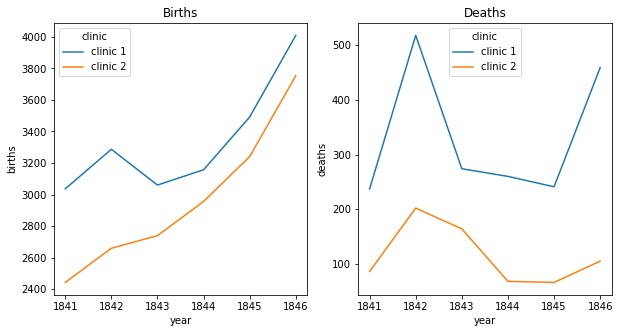

In [101]:
fig, ax = plt.subplots(1,2, sharex = False, figsize = (10,5))
ax[0].set_title('Births')
ax[1].set_title('Deaths')
sns.lineplot(ax = ax[0], x = yearly['year'], y = yearly['births'], hue = yearly['clinic'])
sns.lineplot(ax = ax[1], x = yearly['year'], y = yearly['deaths'], hue = yearly['clinic'])